[*********************100%***********************]  1 of 1 completed


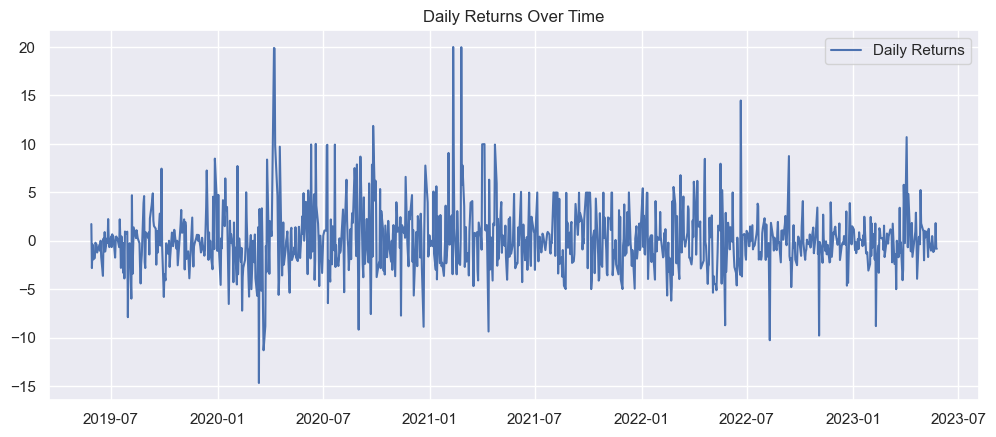

In [5]:


from arch import arch_model
#from arch.__future__ import reindexing
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
%matplotlib inline
start = datetime.datetime(2016, 1, 1)
import yfinance as yf
data = pd.DataFrame()


ticker = 'MANALIPETC.NS'
stock_data = yf.download(ticker,period="4y")
stock_data['Return'] = 100 * (stock_data['Close'].pct_change())
stock_data.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(stock_data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [7]:
model_garch_1_1 = arch_model(stock_data['Return'][1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 2732.3454821816495
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2535.455391239641
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2535.4553899381717
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2535.46
Distribution:                  Normal   AIC:                           5078.91
Method:            Maximum Likelihood   BIC:                           5098.50
                                        No. Observations:                  989
Date:                Thu, May 25 2023   Df Residuals:                      988
Time:                        11:24:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0516  9.200e-02      0.560      0.575 [ -0.129,  0.232]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5097      0.480      1.061      0.289    [ -0.432,  1.451]
alpha[1]       0.1010  7.159e-02      1.411      0.158 [-3.933e-02,  0.241]
beta[1]        0.8586      0.102      8.420  3.773e-17    [  0.659,  1.058]
===========================================================================

Covariance estimator: robust
"""

In [8]:
model_garch_1_1 = arch_model(stock_data['Return'][1:], mean = "Constant", vol = "GARCH", p = 1, q = 2)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 2535.938577069541
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2534.980144470988
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2534.979595327907
            Iterations: 14
            Function evaluations: 96
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2534.98
Distribution:                  Normal   AIC:                           5079.96
Method:            Maximum Likelihood   BIC:                           5104.44
                                        No. Observations:                  989
Date:                Thu, May 25 2023   Df Residuals:                      988
Time:                        11:24:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0416      0.103      0.406      0.685 [ -0.159,  0.243]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5473      0.865      0.633      0.527   [ -1.148,  2.243]
alpha[1]       0.1101      0.123      0.894      0.371   [ -0.131,  0.352]
beta[1]        0.5724      0.258      2.222  2.628e-02 [6.753e-02,  1.077]
beta[2]        0.2729      0.384      0.710      0.478   [ -0.480,  1.026]
==========================================================================

Covariance estimator: robust
"""

In [9]:
gm_forecast = results_garch_1_1.forecast(horizon = 30)

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [10]:
gm_forecast

In [11]:
print(gm_forecast.variance[-1:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2023-05-25  4.793355  5.143469  5.365773  5.613033  5.842451  6.066502   

               h.07      h.08     h.09      h.10  ...      h.21      h.22  \
Date                                              ...                       
2023-05-25  6.28202  6.490251  6.69118  6.885137  ...  8.621154  8.747975   

                h.23      h.24      h.25      h.26    h.27     h.28      h.29  \
Date                                                                            
2023-05-25  8.870384  8.988536  9.102578  9.212653  9.3189  9.42145  9.520434   

                h.30  
Date                  
2023-05-25  9.615974  

[1 rows x 30 columns]


In [12]:
a = gm_forecast.variance[-1:]

In [13]:
ar = []
for i in range(0,30):
    ar.append(a.iloc[:,i].values[0])

In [14]:
 import datetime

base = datetime.datetime.today()
date_list = [base + datetime.timedelta(days=x) for x in range(30)]

In [15]:
import pandas as pd
import numpy as np
images = np.array(ar)
label = np.array(date_list)
dataset = pd.DataFrame({'Date': list(label), 'Volatility': list(images)}, columns=['Date', 'Volatility'])

<AxesSubplot:>

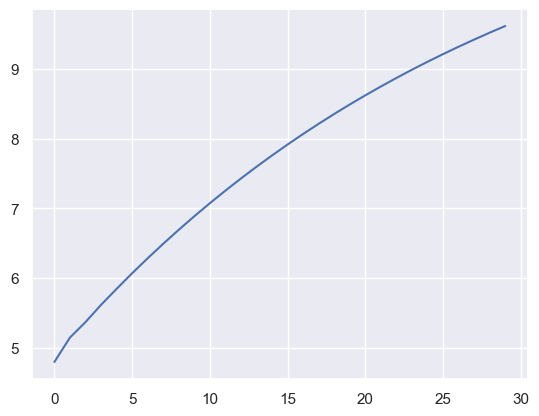

In [16]:
dataset['Volatility'].plot()

In [17]:
from pmdarima.arima import auto_arima
model_auto = auto_arima(stock_data['Close'])

In [18]:
model_auto 

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
model_auto_pred_pr = auto_arima(stock_data['Close'], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

model_auto_pred_pr.predict(n_periods = 20)

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


990     71.656643
991     71.651231
992     71.498155
993     71.512258
994     71.526735
995     71.472282
996     71.419212
997     71.428271
998     71.379996
999     71.326444
1000    71.289963
1001    71.255848
1002    71.221585
1003    71.187176
1004    71.152618
1005    71.117914
1006    71.083062
1007    71.048063
1008    71.012916
1009    70.977622
dtype: float64

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
model = ARIMA(stock_data['Close'], order=(1,1,3))
res = model.fit()
res.summary()

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  990
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -2142.273
Date:                Thu, 25 May 2023   AIC                           4294.547
Time:                        11:24:21   BIC                           4319.030
Sample:                             0   HQIC                          4303.857
                                - 990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8050      0.140     -5.739      0.000      -1.080      -0.530
ma.L1          0.9611      0.143      6.742      0.000       0.682       1.241
ma.L2          0.1003      0.039      2.563      0.010       0.024       0.177
ma.L3         -0.0527      0.024     -2.219      0.027      -0.099      -0.006
sigma2         4.4561      0.110     40.343      0.000       4.240       4.673
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1048.39
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.83   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
res.predict(start = 1699, end = 1710, dynamic = True )

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


1699    71.65608
1700    71.65608
1701    71.65608
1702    71.65608
1703    71.65608
1704    71.65608
1705    71.65608
1706    71.65608
1707    71.65608
1708    71.65608
1709    71.65608
1710    71.65608
Name: predicted_mean, dtype: float64

In [22]:
dataset

,Date,Volatility
0,2023-05-25 11:24:09.116729,4.793355
1,2023-05-26 11:24:09.116729,5.143469
2,2023-05-27 11:24:09.116729,5.365773
3,2023-05-28 11:24:09.116729,5.613033
4,2023-05-29 11:24:09.116729,5.842451
5,2023-05-30 11:24:09.116729,6.066502
6,2023-05-31 11:24:09.116729,6.282020
7,2023-06-01 11:24:09.116729,6.490251
8,2023-06-02 11:24:09.116729,6.691180
9,2023-06-03 11:24:09.116729,6.885137
